In [690]:
import numpy as np
import matplotlib.pyplot as plt

In [691]:
N = 20

In [692]:
x = np.random.rand(N,2)

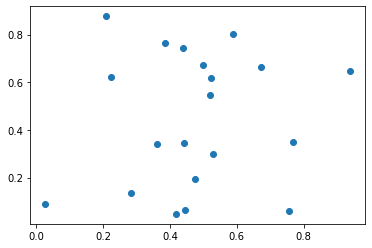

In [693]:
plt.scatter(x[:,0],x[:,1])

In [694]:
def sort_points(x: list[list], x0: list):
    """ Sort points by distance to a seed point x0, by the second order euclidean dist |xi - x0|**2"""
    return sorted(x, key=lambda xi: np.linalg.norm(xi-x0,2))

In [695]:
x0 = x[0]
x = np.delete(x,0,0)

# Find the closest point to x0
x = sort_points(x,x0)

# 
xj = x[1]
x = np.delete(x,1,0)

In [696]:
def circle_center(A,B,C) -> list[float]:
    D = 2*(A[0]*(B[1]-C[1]) + B[0]*(C[1]-A[1]) + C[0]*(A[1]-B[1]))
    Ux = (A[0]**2+A[1]**2)*(B[1]-C[1])+(B[0]**2+B[1]**2)*(C[1]-A[1])+(C[0]**2+C[1]**2)*(A[1]-B[1])
    Uy = (A[0]**2+A[1]**2)*(C[0]-B[0])+(B[0]**2+B[1]**2)*(A[0]-C[0])+(C[0]**2+C[1]**2)*(B[0]-A[0])
    return np.array([Ux/D,Uy/D])

In [697]:
A_min = np.Infinity
A_min_index = None

for i, xk in enumerate(x):
    a = np.linalg.norm(xk - x0)
    b = np.linalg.norm(x0 - xj)
    c = np.linalg.norm(xj - x0)
    s = (a+b+c) * 0.5
    A = np.pi * 0.25 * s**2
    if A < A_min:
        A_min = A
        A_min_index = i

xk = x[A_min_index]
x = np.delete(x, A_min_index, 0)
C = circle_center(x0,xj,xk)

### Visualize / check everything is working

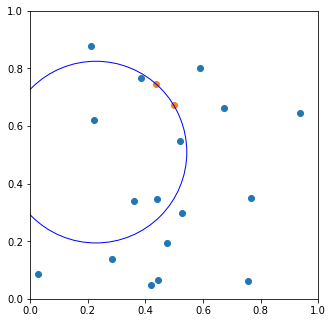

In [698]:
plt.figure(figsize=[5, 5])
plt.axes([0.1, 0.1, 0.8, 0.8], xlim=(0, 1), ylim=(0, 1))
plt.scatter(x=x[:,0],y=x[:,1])
plt.scatter(x=[xj[0],x0[0]],y=[xj[1],x0[1]])

points_whole_ax = 5 * 0.8 *72    # 1 point = dpi / 72 pixels
R = np.linalg.norm(x0-C)
points_radius = 2 * R / 1.0 * points_whole_ax
plt.scatter(C[0], C[1], s=points_radius**2, facecolors='none', edgecolors='blue')


In [700]:
def angle(point: list[float], center: list[float]) -> float:
    """ Returns the angle in degrees between a point and a center"""
    return (np.arctan2(center[0]-point[0], center[1]-point[1])+np.pi) * 180 / np.pi

In [701]:
# Test sorting
# p = [[0,0],[1,0],[2,0],[2,1],[2,2],[1,2],[0,2],[0,1]]
# sorted(p, key=lambda x: angle(x,[1,1]))
# for i in [[0,0],[1,0],[2,0],[2,1],[2,2],[1,2],[0,2],[0,1]]:
#     print(angle(i,[1,1]))

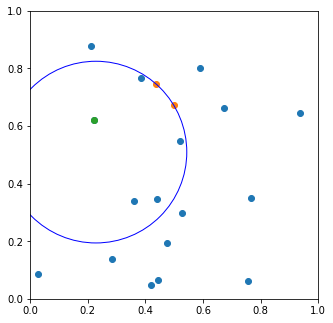

In [704]:
plt.figure(figsize=[5, 5])
plt.axes([0.1, 0.1, 0.8, 0.8], xlim=(0, 1), ylim=(0, 1))
plt.scatter(x=x[:,0],y=x[:,1])
plt.scatter(x=[xj[0],x0[0]],y=[xj[1],x0[1]])

points_whole_ax = 5 * 0.8 *72    # 1 point = dpi / 72 pixels
R = np.linalg.norm(x0-C)
points_radius = 2 * R / 1.0 * points_whole_ax
plt.scatter(C[0], C[1], s=points_radius**2, facecolors='none', edgecolors='blue')

si = sort_points(x, C)

plt.scatter(x=[si[0][0]], y=[si[0][1]])
